## Python Examples to Extract and Analysis of SciDB data using PIC-SURE API

### Introduction

These sample codes show how to connect to SciDB and query from SSC (Simons Simplex Collection) based on PIC-SURE API. SSC is a resource of phenotypic and genetic data and biospecimens for use by autism researchers. Researchers can access to biospecimens, phenotypic data, full exome or CNV sequencing data, or to recruit SSC families for additional studies.

This example mainly achieves the following functions:

1. How many individuals are there in Family_ID = 11002
2. Apply filters to query the values queal to VCF_GT. Some figures are plotted to show the propotion of different VCF_GT values.
3. Query how many variants do all mothers/father/proband have.
4. Visualization.

### Steps to perform the study

1. Install all of the required packages
2. Start a session and connect to PIC-SURE API using URLs and the API key
3. Query the paths of each selected parameters
4. Run SciDB query and get the data in JSON/CSV format
5. Plot the query results for visualization.
6. Perform your own analysis based the query.

#### Package Installation

The required packages can be installed based on the commands from Terminal. For example:
1. matplotlib: pip install matplotlib 
2. numpy: pip install numpy

#### Start a session and connect to PIC-SURE API using URLs and the API key
To get a token and start a session, go to https://ssc-dev.hms.harvard.edu. The following function is used to connect to start a session and show the available resources. If there is no errors, the connection has been made.

In [ ]:
token="Your Key"
test_token = "td62j7i201kp7p5m2oupt9q8ib"
import requests
import matplotlib.pyplot as plt 
import random
###  Start Session  ###
session = requests.session()
secureSessionResponse = session.get("https://ssc.hms.harvard.edu/rest/v1/securityService/startSession?key="+test_token)

###  SciDB in Resource List  ###
getSession = session.get("https://ssc.hms.harvard.edu/rest/v1/resourceService/resources").json()
resources = list(map(lambda resource: resource['name'], session.get("https://ssc.hms.harvard.edu/rest/v1/resourceService/resources").json()))
print("Resources Available \n")
print(resources)


#### Query the paths of each selected parameters
This is to show the top level paths in SciDB. 'resorces[1]' means the second resource of the available resources.

In [90]:
""" Scidb Connection """
###  SciDB Array List  ###
print("Top Level Paths in "+resources[0])
scidbconnect = session.get("https://ssc.hms.harvard.edu/rest/v1/resourceService/path/" + resources[0]).json()
for name in scidbconnect:
    print(name['name'] + ': ' + name['pui'])

Top Level Paths in SciDB
Data: /SciDB/Data
DataI: /SciDB/DataI
Data_Load: /SciDB/Data_Load
DBNSFP_V2p9_CHROMOSOME: /SciDB/DBNSFP_V2p9_CHROMOSOME
DBNSFP_V2p9_VARIANT: /SciDB/DBNSFP_V2p9_VARIANT
GENE_37: /SciDB/GENE_37
IHI_ACCELEROMETER: /SciDB/IHI_ACCELEROMETER
IHI_ACTIVITY: /SciDB/IHI_ACTIVITY
IHI_LIGHT: /SciDB/IHI_LIGHT
IHI_SLEEP_PREDICTION: /SciDB/IHI_SLEEP_PREDICTION
Individual_ID_Index: /SciDB/Individual_ID_Index
KG_CHROMOSOME: /SciDB/KG_CHROMOSOME
KG_GENOTYPE: /SciDB/KG_GENOTYPE
KG_POPULATION: /SciDB/KG_POPULATION
KG_SAMPLE: /SciDB/KG_SAMPLE
KG_VAR_CENTERED: /SciDB/KG_VAR_CENTERED
KG_VAR_CV: /SciDB/KG_VAR_CV
KG_VARIANT: /SciDB/KG_VARIANT
KG_VAR_SVD: /SciDB/KG_VAR_SVD
KG_VAR_SVD_2: /SciDB/KG_VAR_SVD_2
MetaData: /SciDB/MetaData
MetaDataI: /SciDB/MetaDataI
model: /SciDB/model
MODIS_DATA: /SciDB/MODIS_DATA
MODIS_PLACES: /SciDB/MODIS_PLACES
predictions: /SciDB/predictions
R_array10f177d69fb11478638428261659490: /SciDB/R_array10f177d69fb11478638428261659490
R_array11ee80cca0114786392675

#### Query the attributes and dimensions of each selected table
The following function is used to show SciDB attributes (table DataI and table VariantsI). The table name can be changed if you want to show other tables.

In [92]:
### SciDB Array Attributes and Dimensions ###
DataI = session.get("https://ssc.hms.harvard.edu/rest/v1/resourceService/path/SciDB/DataI/").json()# single mutation file
VariantsI = session.get("https://ssc.hms.harvard.edu/rest/v1/resourceService/path/SciDB/VariantsI/").json()# overall annotation file
print("\n ---Names in Data--- \n")
for name in DataI:
    print(name['name'] + ': ' + name['pui'])
    
print("\n ---Names in DataI--- \n")
for name in DataI:
    print(name['name'] + ': ' + name['pui'])
    
print("\n ---Names in VariantsI--- \n")
for name in VariantsI:
    print('"' + name['name'] + '" ', end='')


 ---Names in Data--- 

VCF_GT: /SciDB/DataI/VCF_GT
Ref: /SciDB/DataI/Ref
Alt: /SciDB/DataI/Alt
TNRA: /SciDB/DataI/TNRA
VarID: /SciDB/DataI/VarID
VCF_PL: /SciDB/DataI/VCF_PL
VCF_AD: /SciDB/DataI/VCF_AD
VCF_CQ: /SciDB/DataI/VCF_CQ
VCF_DP: /SciDB/DataI/VCF_DP
Individual_ID: /SciDB/DataI/Individual_ID

 ---Names in DataI--- 

VCF_GT: /SciDB/DataI/VCF_GT
Ref: /SciDB/DataI/Ref
Alt: /SciDB/DataI/Alt
TNRA: /SciDB/DataI/TNRA
VarID: /SciDB/DataI/VarID
VCF_PL: /SciDB/DataI/VCF_PL
VCF_AD: /SciDB/DataI/VCF_AD
VCF_CQ: /SciDB/DataI/VCF_CQ
VCF_DP: /SciDB/DataI/VCF_DP
Individual_ID: /SciDB/DataI/Individual_ID

 ---Names in VariantsI--- 

"ExAC_ALL" "ClinVar_CLINSIG" "AAChange_ensGene_affectedExons" "CADD_phred" "Alt" "FATHMM_score" "AAChange_ensGene_proteinChanges" "AAChange_knownGene_cDNAchanges" "ExonicFunc_ensGene" "PopFreqMax" "VCF_ID" "MutationTaster_pred" "ClinVar_CLNACC" "ExAC_AFR" "FATHMM_pred" "MutationTaster_score" "ClinVar_CLNDSDB" "AAChange_ensGene_affectedTranscripts" "MutationAssessor_sc

### Running the Queries 
After connecting to API, the 'select' and 'where' can be used to retrieve the path of each selected variables based on query condition. The input of this query function would be the VCF_GT values you want to query. This function will return all of the results after querying.

This query is to calculate the number of family members with different VCF_GT values. For instance, the value of VCF_GT can be "0/1" or "0/2".

In [248]:
# Apply filters a to d: value equals to VCF_GT
p1_gt = ["0/1","0/2","0/3","0/4","0/5","1/1","1/2","1/3","1/4","1/5","2/1","2/2","2/3","2/4","2/5", 
         "3/1","3/2","3/3","3/4","4/1","4/2","4/3","4/4","4/6","5/1","5/3","5/4","6/2"]
result = []
for gt in p1_gt:
    print(gt)
    request = """{
    "select": [
      {
        "field": {
          "pui": "/SciDB/DataI"
        },
        "alias": "NUMBER_OF_FAMILY_MEMBERS",
        "operation": "AGGREGATE",
        "fields" : {
           "FUNCTION" : "count"
        }
      }
      ],
    "where": [
      {
        "field": {
          "pui": "/SciDB/DataI/VCF_GT",
          "dataType": "ATTRIBUTE"
        },
        "predicate": "FILTER",
        "fields": {
          "OPERATOR" : "EQ",
          "VALUE" : "%s"
        }
      }
      ]
    }""" %gt
    resultId = str(session.post("https://ssc.hms.harvard.edu/rest/v1/queryService/runQuery", data=request).json().get('resultId'))
    print('resultId: ' + resultId)
    print("DONE...")

    status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json()
    status
    not_done = True
    if not_done == True:
        print("Wait until query is done processing")
    while not_done :
        status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json().get("status")
        print("=>",end='')
        not_done = True if (status == 'RUNNING') else False
    print('\t')
    print("Status : " + status)
    
    if status == 'AVAILABLE':
        query_results = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/result/"+resultId+"/CSV").text
        print('-----Status Available------')
        print(query_results.split('\n')[1].split(',')[1].strip())
        result.append(query_results.split('\n')[1].split(',')[1].strip())
    else:
        print('-----ERROR!------\n status is not available') 
print(result)

0/1
resultId: 230829
DONE...
Wait until query is done processing
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>	
Status : AVAILABLE
-----Status Available------
180686602
0/2
resultId: 230831
DONE...
Wait until query is done processing
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>	
Status : AVAILABLE
-----Status Av

### Plot the query results for visualization
This function aims to plot the query results. The inputs of this function is the returned query results from the above query function. The first plot aims to show the number of VCF_GT values which are greater than 1,0000 and less than 1,0000 respectively. The second plot aims to show all of the number of queried VCF_GT values.

['180686602', '1431979', '78893', '2099', '29', '108874994', '944210', '100500', '4078', '72', '673486', '284921', '88188', '4778', '88', '44802', '72014', '13534', '3082', '2442', '2908', '3676', '279', '12', '88', '86', '72', '6']


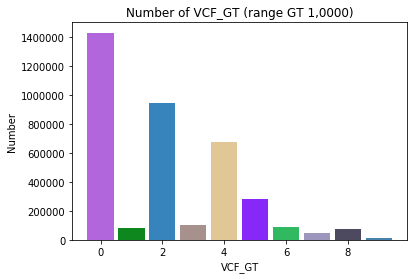

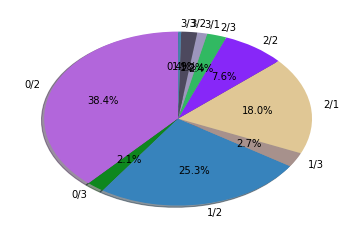

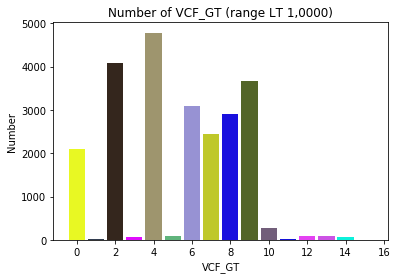

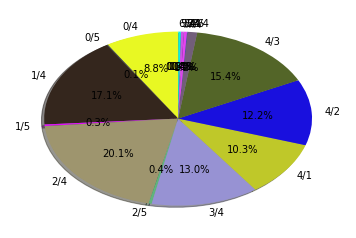

In [289]:
print(result)
new_result = []
new_p1_gt = []
for l in range(len(result)):
    if len(str(result[l])) < 9 and len(str(result[l])) > 4:
        new_result.append(result[l])
        new_p1_gt.append(p1_gt[l])

colors = []
explode = []
for j in range(len(new_result)):
    r = lambda: random.randint(0,255)
    colors.append('#%02X%02X%02X' % (r(),r(),r()))
    explode.append(0)
n_groups = len(new_result) 
fig, ax = plt.subplots()  
index = np.arange(n_groups)  
bar_width = 0.85  
opacity = 1
rects1 = plt.bar(index, new_result, bar_width,alpha=opacity, color=colors,label='Men')  
plt.xlabel('VCF_GT')    
plt.ylabel('Number')    
plt.title('Number of VCF_GT (range GT 1,0000)') 
plt.show()
print('\n')
plt.pie(new_result, explode=explode, labels=new_p1_gt, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

new_result1 = []
new_p1_gt1 = []
for l in range(len(result)):
    if len(str(result[l])) < 5:
        new_result1.append(result[l])
        new_p1_gt1.append(p1_gt[l])

colors = []
explode = []
for j in range(len(new_result1)):
    r = lambda: random.randint(0,255)
    colors.append('#%02X%02X%02X' % (r(),r(),r()))
    explode.append(0)
n_groups = len(new_result1) 
fig, ax = plt.subplots()  
index = np.arange(n_groups)  
bar_width = 0.85  
opacity = 1
rects1 = plt.bar(index, new_result1, bar_width,alpha=opacity, color=colors,label='Men')  
plt.xlabel('VCF_GT')    
plt.ylabel('Number')    
plt.title('Number of VCF_GT (range LT 1,0000)') 
plt.show()
print('\n')
plt.pie(new_result1, explode=explode, labels=new_p1_gt1, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


['180686602', '1431979', '78893', '2099', '29', '108874994', '944210', '100500', '4078', '72', '673486', '284921', '88188', '4778', '88', '44802', '72014', '13534', '3082', '2442', '2908', '3676', '279', '12', '88', '86', '72', '6']


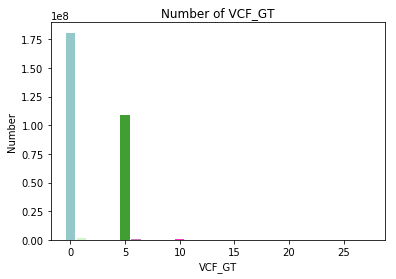

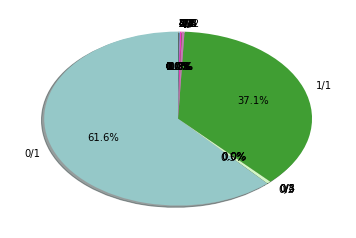

In [271]:
print(result)

colors = []
explode = []
for j in range(len(result)):
    r = lambda: random.randint(0,255)
    colors.append('#%02X%02X%02X' % (r(),r(),r()))
    explode.append(0)
n_groups = len(result) 
fig, ax = plt.subplots()  
index = np.arange(n_groups)  
bar_width = 0.85  
opacity = 1
rects1 = plt.bar(index, result, bar_width,alpha=opacity, color=colors,label='Men')  
plt.xlabel('VCF_GT')    
plt.ylabel('Number')    
plt.title('Number of VCF_GT') 
plt.show()
print('\n')
plt.pie(result, explode=explode, labels=p1_gt, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()


### Running the Queries (2) 
This is to query how many individuals are there in Family_ID = 11002. The queried family id is user defined. The inputs of this query code are family id and the outputs are the number of family members. 

In [263]:
### How many individuals are there in Family_ID = 11002
request = """{
"select": [
      {
        "field": {
          "pui": "/SciDB/MetaData"
        },
        "alias": "NUMBER_OF_FAMILY_MEMBERS",
        "operation": "AGGREGATE",
        "fields" : {
           "FUNCTION" : "count"
        }
      }
  ],
  "where": [
      {
        "field": {
          "pui": "/SciDB/MetaData/Family_ID",
          "dataType": "ATTRIBUTE"
        },
        "predicate": "FILTER",
        "fields": {
          "OPERATOR" : "EQ",
          "VALUE" : "11002"
        }
      }
  ]
}"""
resultId = str(session.post("https://ssc.hms.harvard.edu/rest/v1/queryService/runQuery", data=request).json().get('resultId'))
print('resultId: ' + resultId)
print("DONE...")

status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json()
status
not_done = True
if not_done == True:
    print("Wait until query is done processing")
while not_done :
    status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json().get("status")
    print("=>",end='')
    not_done = True if (status == 'RUNNING') else False
print('\t')
print("Status : " + status)

if status == 'AVAILABLE':
    query_results = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/result/"+resultId+"/CSV").text
    print('-----Status Available------')
    print(query_results)
else:
    print('-----ERROR!------\n status is not available')

resultId: 230889
DONE...
Wait until query is done processing
=>=>=>	
Status : AVAILABLE
-----Status Available------
i,NUMBER_OF_FAMILY_MEMBERS
0,4



### Running the Queries (3) 
This is to query how many variants do all mothers have. Cross join is used in this function because the query is from two tables (MetaData and Data). The two tables are joined by a common variable (Individual_ID). It first queries from MetaData to find all the individuals who are with 'mother' status, and then queries from Data table to count the number of variants. The result shows there are 40274453 variants of all mothers have. 

In [260]:
## query how many variants do all mothers have?

request = """{
"select": [
      {
        "field": {
          "pui": "/SciDB/MetaData/Individual_ID"
        },
        "operation": "AGGREGATE",
        "fields" : {
           "FUNCTION" : "count"
        }
      }
  ],
  "join" : [
      {
        "field": {
           "pui": "/SciDB/Data/Individual_ID"
        },
        "joinType" : "CROSSJOIN",
        "fields" : {
           "RIGHT" : {
           "where": [
                   {
                "field": {
                "pui": "/SciDB/MetaData/Status",
                "dataType": "ATTRIBUTE"
                },
                "predicate": "FILTER",
                "fields": {
                "OPERATOR" : "EQ",
                "VALUE" : "mo"
                    }
                    }
           ]
           },
           "DIMENSIONS" : "MetaData.Individual_ID"
        }
      }
    ]
}"""
resultId = str(session.post("https://ssc.hms.harvard.edu/rest/v1/queryService/runQuery", data=request).json().get('resultId'))
print('resultId: ' + resultId)
print("DONE...")

status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json()
status
not_done = True
if not_done == True:
    print("Wait until query is done processing")
while not_done :
    status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json().get("status")
    print("=>",end='')
    not_done = True if (status == 'RUNNING') else False
print('\t')
print("Status : " + status)

resultId: 230887
DONE...
Wait until query is done processing
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>	
Status : AVAILABLE


In [119]:
if status == 'AVAILABLE':
    query_results = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/result/"+resultId+"/CSV").text
    print('-----Status Available------')
    print(query_results)
    mo_no = query_results.split('\n')[1].split(',')[1]
else:
    print('-----ERROR!------\n status is not available')
print(mo_no)

-----Status Available------
i,count
0,40274453

40274453


### Running the Queries (4) 
This is to query how many variants do all fathers have. Cross join is used in this function because the query is from two tables (MetaData and Data). The two tables are joined by a common variable (Individual_ID). It first queries from MetaData to find all the individuals who are with 'father' status, and then queries from Data table to count the number of variants. The result shows there are 40284146 variants of all father have. 

In [132]:
## query how many variants do all fathers have?

request = """{
"select": [
      {
        "field": {
          "pui": "/SciDB/MetaData/Individual_ID"
        },
        "operation": "AGGREGATE",
        "fields" : {
           "FUNCTION" : "count"
        }
      }
  ],
  "join" : [
      {
        "field": {
           "pui": "/SciDB/Data/Individual_ID"
        },
        "joinType" : "CROSSJOIN",
        "fields" : {
           "RIGHT" : {
           "where": [
                   {
                "field": {
                "pui": "/SciDB/MetaData/Status",
                "dataType": "ATTRIBUTE"
                },
                "predicate": "FILTER",
                "fields": {
                "OPERATOR" : "EQ",
                "VALUE" : "fa"
                    }
                    }
           ]
           },
           "DIMENSIONS" : "MetaData.Individual_ID"
        }
      }
    ]
}"""

resultId = str(session.post("https://ssc.hms.harvard.edu/rest/v1/queryService/runQuery", data=request).json().get('resultId'))
print('resultId: ' + resultId)
print("DONE...")

status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json()
status
not_done = True
if not_done == True:
    print("Wait until query is done processing")
while not_done :
    status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json().get("status")
    print("=>",end='')
    not_done = True if (status == 'RUNNING') else False
print('\t')
print("Status : " + status)

resultId: 230442
DONE...
Wait until query is done processing
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>	
Status : AVAILABLE


In [133]:
if status == 'AVAILABLE':
    query_results = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/result/"+resultId+"/CSV").text
    print('-----Status Available------')
    print(query_results)
    fa_no = query_results.split('\n')[1].split(',')[1]
else:
    print('-----ERROR!------\n status is not available')
print(fa_no)

-----Status Available------
i,count
0,40284146

40284146


### Running the Queries (5) 
This is to query how many variants do all probands have. Cross join is used in this function because the query is from two tables (MetaData and Data). The two tables are joined by a common variable (Individual_ID). It first queries from MetaData to find all the individuals who are with 'probands (p1)' status, and then queries from Data table to count the number of variants. The result shows there are 40329967 variants of all probands have. 

In [154]:
## query how many variants do all probands have?

request = """{
"select": [
      {
        "field": {
          "pui": "/SciDB/MetaData/Individual_ID"
        },
        "operation": "AGGREGATE",
        "fields" : {
           "FUNCTION" : "count"
        }
      }
  ],
  "join" : [
      {
        "field": {
           "pui": "/SciDB/Data/Individual_ID"
        },
        "joinType" : "CROSSJOIN",
        "fields" : {
           "RIGHT" : {
           "where": [
                   {
                "field": {
                "pui": "/SciDB/MetaData/Status",
                "dataType": "ATTRIBUTE"
                },
                "predicate": "FILTER",
                "fields": {
                "OPERATOR" : "EQ",
                "VALUE" : "p1"
                    }
                    }
           ]
           },
           "DIMENSIONS" : "MetaData.Individual_ID"
        }
      }
    ]
}"""

resultId = str(session.post("https://ssc.hms.harvard.edu/rest/v1/queryService/runQuery", data=request).json().get('resultId'))
print('resultId: ' + resultId)
print("DONE...")

status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json()
status
not_done = True
if not_done == True:
    print("Wait until query is done processing")
while not_done :
    status = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/resultStatus/"+resultId).json().get("status")
    print("=>",end='')
    not_done = True if (status == 'RUNNING') else False
print('\t')
print("Status : " + status)

resultId: 230448
DONE...
Wait until query is done processing
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>	
Status : AVAILABLE


In [155]:
if status == 'AVAILABLE':
    query_results = session.get("https://ssc.hms.harvard.edu/rest/v1/resultService/result/"+resultId+"/CSV").text
    print('-----Status Available------')
    print(query_results)
    p1_no = query_results.split('\n')[1].split(',')[1]
else:
    print('-----ERROR!------\n status is not available')
print(p1_no)

-----Status Available------
i,count
0,40329967

40329967


### Visualization
After retrieval the number of variant do all mothers/fathers/probands have, the results can be visualized by using the pie chart. As it can be seen from the graphs, there are approximate equivalent variants number of all mothers, fathers and probands.

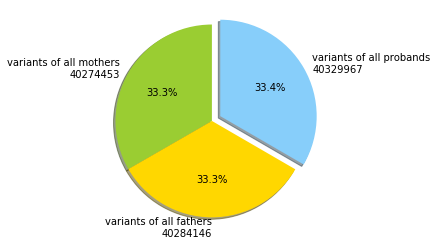

In [161]:
labels = 'variants of all mothers\n'+str(mo_no).strip(), 'variants of all fathers\n'+str(fa_no).strip(), 'variants of all probands\n'+str(p1_no).strip()
sizes = [int(mo_no),int(fa_no),int(p1_no)]
colors = ['yellowgreen', 'gold','lightskyblue']
explode = (0, 0,0.1) # only "explode" the 2nd slice 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()